## Business Objective: 
1. To predict whether a high-value customer will churn or not.
2. To identify important variables that are strong predictors of churn.

## Goals of Data Analysis:
1. Filter high-value customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months(good phase).
2. Predict the churn in the last (i.e. ninth(September)) month using the data (features) from the first three months(i.e. Sixth(June), Seventh(July), Eighth(August)). First two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
3. Identify important variables that are strong predictors of churn

In [0]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preparation and understanding 
### Explore and verify data

In [0]:
# Loading telecom churn data into dataframe tel_df
tel_df = pd.read_csv("telecom_churn_data.csv")

# Checking data of dataframe tel_df
pd.set_option('display.max_columns', None)
tel_df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [0]:
# Checking shape of dataframe tel_df
tel_df.shape

(99999, 226)

In [0]:
# Checking information of columns of dataframe tel_df
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [0]:
# Checking summary statistics of dataframe tel_df
tel_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### Data Cleaning - data quality checks, inconsistent/missing data handling

In [0]:
# Checking uniqueness of all the columns of dataframe tel_df
clms = []
for x in tel_df.columns.tolist():
    if len(tel_df[x].unique()) == len(tel_df[x]):
        clms.append(x)
    else:
        pass
        
print("List of unique value columns: {}".format(clms))

List of unique value columns: ['mobile_number']


In [0]:
# Removing Unique value columns of dataframe tel_df
tel_df = tel_df.drop(clms, axis=1)

In [0]:
#Checking if there is any whitespace before and after the column-names of dataframe tel_df
no_col_space = 0
for x in tel_df.columns.tolist():
    if x[0] == " " or x[-1] == " ":
        print(x)
        no_col_space += 1 
        
print("Total number of columns with white space at the begining or end of column-name: {}".format(no_col_space))

Total number of columns with white space at the begining or end of column-name: 0


In [0]:
# Checking duplicated rows in the dataframe tel_df
print("There is duplicate value in the dataframe: {}".format(tel_df.duplicated().any()))

There is duplicate value in the dataframe: False


In [0]:
# number of columns which have all NaNs values:
tel_df.isnull().all(axis=0).sum()

0

In [0]:
# number of rows which have all NaNs values:
tel_df.isnull().all(axis=1).sum()

0

In [0]:
# Checking list of columns of dataframe tel_df
tel_df.columns.tolist()

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',


In [0]:
# Checking values of "circle_id"
tel_df["circle_id"].astype('category').value_counts()

109    99999
Name: circle_id, dtype: int64

In [0]:
# Removing column "circle_id" as it is having same value
tel_df = tel_df.drop(["circle_id"], axis = 1)

In [0]:
# Creating function to check missing values in each column of dataframe tel_df
def missing_value(n):
    missing_data = round(100*(tel_df.isnull().sum()/len(tel_df.index)), 2)
    missing_df = pd.DataFrame(missing_data)
    missing_df = missing_df.reset_index()
    missing_df = missing_df.rename(columns={"index":"Columns", 0:"Missing Values(%)"})
    missing_df  = missing_df.sort_values(by="Missing Values(%)", ascending = False)
    return(missing_df[missing_df["Missing Values(%)"] > 0.00].head(n))
missing_value(35)

Columns  Missing Values(%)
155  date_of_last_rech_data_6              74.85
191                 arpu_2g_6              74.85
171           count_rech_3g_6              74.85
195          night_pck_user_6              74.85
167           count_rech_2g_6              74.85
187                 arpu_3g_6              74.85
163           max_rech_data_6              74.85
175        av_rech_amt_data_6              74.85
215                 fb_user_6              74.85
159         total_rech_data_6              74.85
196          night_pck_user_7              74.43
156  date_of_last_rech_data_7              74.43
192                 arpu_2g_7              74.43
164           max_rech_data_7              74.43
188                 arpu_3g_7              74.43
216                 fb_user_7              74.43
160         total_rech_data_7              74.43
176        av_rech_amt_data_7              74.43
172           count_rech_3g_7              74.43
168           count_rech_2g_7              74.43
190                 arpu_3g_9              74.08
174           count_rech_3g_9              74.08
178        av_rech_amt_data_9              74.08
162         total_rech_data_9              74.08
194                 arpu_2g_9              74.08
170           count_rech_2g_9              74.08
166           max_rech_data_9              74.08
198          night_pck_user_9              74.08
158  date_of_last_rech_data_9              74.08
218                 fb_user_9              74.08
173           count_rech_3g_8              73.66
177        av_rech_amt_data_8              73.66
169           count_rech_2g_8              73.66
165           max_rech_data_8              73.66
189                 arpu_3g_8              73.66

As we can see that columns av_rech_amt_data_7, total_rech_data_7, days_of_last_rech_data, night_pck_user, count_rech_3g, count_rech_2g, fb_user, max_rech_data, arpu_2g and arpu_3g are having same amount of missing values for a particular month which shows that no use of data for no recharge of data.

In [0]:
# Imputing columns which is having missing values 73.66% or more.
for x in tel_df.columns:
    if round(100*(tel_df[x].isnull().sum()/len(tel_df.index)), 2) >= 73.66:
        tel_df[x] = tel_df[x].fillna(0)
missing_value(30)

Columns  Missing Values(%)
46       loc_og_mou_9               7.75
22      roam_ic_mou_9               7.75
110  std_ic_t2f_mou_9               7.75
30   loc_og_t2t_mou_9               7.75
34   loc_og_t2m_mou_9               7.75
38   loc_og_t2f_mou_9               7.75
42   loc_og_t2c_mou_9               7.75
106  std_ic_t2m_mou_9               7.75
50   std_og_t2t_mou_9               7.75
54   std_og_t2m_mou_9               7.75
58   std_og_t2f_mou_9               7.75
102  std_ic_t2t_mou_9               7.75
62   std_og_t2c_mou_9               7.75
66       std_og_mou_9               7.75
70       isd_og_mou_9               7.75
74       spl_og_mou_9               7.75
98       loc_ic_mou_9               7.75
78        og_others_9               7.75
130      isd_ic_mou_9               7.75
86   loc_ic_t2t_mou_9               7.75
90   loc_ic_t2m_mou_9               7.75
26      roam_og_mou_9               7.75
94   loc_ic_t2f_mou_9               7.75
114  std_ic_t2o_mou_9               7.75
126      spl_ic_mou_9               7.75
14        onnet_mou_9               7.75
134       ic_others_9               7.75
118      std_ic_mou_9               7.75
18       offnet_mou_9               7.75
129      isd_ic_mou_8               5.38

As we can see that columns belong to "incoming/outgoing minutes of usage" are having same amount of missing values for ninth month which shows that no use of incoming/outgoing service.

In [0]:
# Imputing columns which is having missing values 7.75%.
for x in tel_df.columns:
    if round(100*(tel_df[x].isnull().sum()/len(tel_df.index)), 2) == 7.75:
        tel_df[x] = tel_df[x].fillna(0)
missing_value(30)

Columns  Missing Values(%)
93      loc_ic_t2f_mou_8               5.38
105     std_ic_t2m_mou_8               5.38
21         roam_ic_mou_8               5.38
25         roam_og_mou_8               5.38
125         spl_ic_mou_8               5.38
65          std_og_mou_8               5.38
29      loc_og_t2t_mou_8               5.38
109     std_ic_t2f_mou_8               5.38
61      std_og_t2c_mou_8               5.38
33      loc_og_t2m_mou_8               5.38
57      std_og_t2f_mou_8               5.38
37      loc_og_t2f_mou_8               5.38
117         std_ic_mou_8               5.38
53      std_og_t2m_mou_8               5.38
41      loc_og_t2c_mou_8               5.38
113     std_ic_t2o_mou_8               5.38
49      std_og_t2t_mou_8               5.38
73          spl_og_mou_8               5.38
69          isd_og_mou_8               5.38
17          offnet_mou_8               5.38
13           onnet_mou_8               5.38
89      loc_ic_t2m_mou_8               5.38
97          loc_ic_mou_8               5.38
85      loc_ic_t2t_mou_8               5.38
133          ic_others_8               5.38
101     std_ic_t2t_mou_8               5.38
45          loc_og_mou_8               5.38
129         isd_ic_mou_8               5.38
77           og_others_8               5.38
150  date_of_last_rech_9               4.76

As we can see that columns belong to "incoming/outgoing minutes of usage" are having same amount of missing values for eighth month which shows that no use of incoming/outgoing service.

In [0]:
# Imputing columns which is having missing values 5.38%.
for x in tel_df.columns:
    if round(100*(tel_df[x].isnull().sum()/len(tel_df.index)), 2) == 5.38:
        tel_df[x] = tel_df[x].fillna(0)
missing_value(30)

Columns  Missing Values(%)
150  date_of_last_rech_9               4.76
115         std_ic_mou_6               3.94
31      loc_og_t2m_mou_6               3.94
23         roam_og_mou_6               3.94
111     std_ic_t2o_mou_6               3.94
87      loc_ic_t2m_mou_6               3.94
27      loc_og_t2t_mou_6               3.94
107     std_ic_t2f_mou_6               3.94
47      std_og_t2t_mou_6               3.94
67          isd_og_mou_6               3.94
19         roam_ic_mou_6               3.94
103     std_ic_t2m_mou_6               3.94
35      loc_og_t2f_mou_6               3.94
91      loc_ic_t2f_mou_6               3.94
99      std_ic_t2t_mou_6               3.94
39      loc_og_t2c_mou_6               3.94
43          loc_og_mou_6               3.94
51      std_og_t2m_mou_6               3.94
95          loc_ic_mou_6               3.94
83      loc_ic_t2t_mou_6               3.94
127         isd_ic_mou_6               3.94
63          std_og_mou_6               3.94
71          spl_og_mou_6               3.94
59      std_og_t2c_mou_6               3.94
131          ic_others_6               3.94
75           og_others_6               3.94
11           onnet_mou_6               3.94
55      std_og_t2f_mou_6               3.94
15          offnet_mou_6               3.94
123         spl_ic_mou_6               3.94

As we can see that columns belong to "incoming/outgoing minutes of usage" are having same amount of missing values for sixth month which shows that no use of incoming/outgoing service.

In [0]:
# Imputing columns which is having missing values 3.94%.
for x in tel_df.columns:
    if round(100*(tel_df[x].isnull().sum()/len(tel_df.index)), 2) == 3.94:
        tel_df[x] = tel_df[x].fillna(0)
missing_value(25)

Columns  Missing Values(%)
150  date_of_last_rech_9               4.76
112     std_ic_t2o_mou_7               3.86
64          std_og_mou_7               3.86
88      loc_ic_t2m_mou_7               3.86
84      loc_ic_t2t_mou_7               3.86
76           og_others_7               3.86
24         roam_og_mou_7               3.86
72          spl_og_mou_7               3.86
68          isd_og_mou_7               3.86
28      loc_og_t2t_mou_7               3.86
92      loc_ic_t2f_mou_7               3.86
60      std_og_t2c_mou_7               3.86
56      std_og_t2f_mou_7               3.86
52      std_og_t2m_mou_7               3.86
32      loc_og_t2m_mou_7               3.86
48      std_og_t2t_mou_7               3.86
44          loc_og_mou_7               3.86
20         roam_ic_mou_7               3.86
96          loc_ic_mou_7               3.86
36      loc_og_t2f_mou_7               3.86
12           onnet_mou_7               3.86
132          ic_others_7               3.86
128         isd_ic_mou_7               3.86
100     std_ic_t2t_mou_7               3.86
116         std_ic_mou_7               3.86

As we can see that columns belong to "incoming/outgoing minutes of usage" are having same amount of missing values for seventh month which shows that no use of incoming/outgoing service.

In [0]:
# Imputing columns which is having missing values 3.86%.
for x in tel_df.columns:
    if round(100*(tel_df[x].isnull().sum()/len(tel_df.index)), 2) == 3.86:
        tel_df[x] = tel_df[x].fillna(0)
missing_value(25)

Columns  Missing Values(%)
150   date_of_last_rech_9               4.76
149   date_of_last_rech_8               3.62
148   date_of_last_rech_7               1.77
6    last_date_of_month_9               1.66
147   date_of_last_rech_6               1.61
5    last_date_of_month_8               1.10
0          loc_og_t2o_mou               1.02
2          loc_ic_t2o_mou               1.02
1          std_og_t2o_mou               1.02
4    last_date_of_month_7               0.60

In [0]:
# Checking values of columns "std_og_t2o_mou", "loc_ic_t2o_mou", "loc_og_t2o_mou"
print(tel_df["std_og_t2o_mou"].astype('category').value_counts())
print(tel_df["loc_ic_t2o_mou"].astype('category').value_counts())
print(tel_df["loc_og_t2o_mou"].astype('category').value_counts())

0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
0.0    98981
Name: loc_og_t2o_mou, dtype: int64


In [0]:
# Removing columns "std_og_t2o_mou", "loc_ic_t2o_mou", "loc_og_t2o_mou" as they have same value 0
tel_df = tel_df.drop(["std_og_t2o_mou", "loc_ic_t2o_mou", "loc_og_t2o_mou"], axis = 1)
missing_value(25)

Columns  Missing Values(%)
147   date_of_last_rech_9               4.76
146   date_of_last_rech_8               3.62
145   date_of_last_rech_7               1.77
3    last_date_of_month_9               1.66
144   date_of_last_rech_6               1.61
2    last_date_of_month_8               1.10
1    last_date_of_month_7               0.60

In [0]:
# Columns belong to last_date_of_month are not necessary for the prdiction as it has same value, the last date of month
# Removing columns 'last_date_of_month_9', 'last_date_of_month_8', 'last_date_of_month_7', , 'last_date_of_month_6'
tel_df = tel_df.drop(['last_date_of_month_9', 'last_date_of_month_8', 'last_date_of_month_7', 'last_date_of_month_6'], axis = 1)

In [0]:
# Calculating total amount for recharging data
tel_df['total_data_rech_amt_6'] = tel_df["total_rech_data_6"] * tel_df["av_rech_amt_data_6"]
tel_df['total_data_rech_amt_7'] = tel_df["total_rech_data_7"] * tel_df["av_rech_amt_data_7"]
tel_df['total_data_rech_amt_8'] = tel_df["total_rech_data_8"] * tel_df["av_rech_amt_data_8"]

# Calculating total recharge amount
tel_df['total_amt_6'] = tel_df["total_rech_amt_6"] + tel_df["total_data_rech_amt_6"]
tel_df['total_amt_7'] = tel_df["total_rech_amt_7"] + tel_df["total_data_rech_amt_7"]
tel_df['total_amt_8'] = tel_df["total_rech_amt_8"] + tel_df["total_data_rech_amt_8"]

# Calculating average of total recharge amount of month 6 and 7
tel_df['av_total_amt_6_7'] = (tel_df["total_amt_6"] + tel_df["total_amt_7"])/2

# Using 70th percentile of churn['av_amt_data_6_7'] to filter dataframe.
tel_df = tel_df[tel_df['av_total_amt_6_7'] >= tel_df['av_total_amt_6_7'].quantile(0.7)]

tel_df = tel_df.drop(['av_total_amt_6_7'], axis = 1)

tel_df.shape

(30001, 223)

In [0]:
#Tagging churners
tel_df['churn'] = tel_df[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: 1 if ((x['total_ic_mou_9'] == 0.00) & (x['total_og_mou_9'] == 0.00) & (x['vol_2g_mb_9'] == 0.00) & (x['vol_3g_mb_9'] == 0.00)) else 0, axis=1)

# Checking the Churn Rate
churn = (sum(tel_df['churn'])/len(tel_df['churn'].index))*100
churn

8.136395453484884

(Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Churn'))

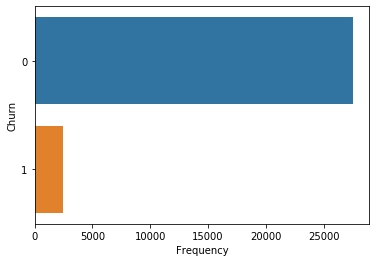

In [0]:
# Univariate Analysis for churning
sns.countplot(y="churn", data=tel_df)
plt.xlabel("Frequency"), plt.ylabel("Churn")

Since data of churners and non-churners are not balanced so we need to to take care of the imbalanced dataset.

In [0]:
# As we are predicting the churn in the ninth month, we do not need any data related to ninth month
# Removing all the columns belong to ninth month
cols_9 = [col for col in tel_df.columns if "9" in col]
tel_df = tel_df.drop(cols_9, axis = 1)
missing_value(25)

Columns  Missing Values(%)
107  date_of_last_rech_8               1.94
106  date_of_last_rech_7               0.33
105  date_of_last_rech_6               0.24

In [0]:
# Checking howmuch rows we can loose if we delete rows with missing values
round(100*((tel_df.isnull().any(axis=1).sum())/len(tel_df.index)), 2)

2.31

In [0]:
# Deleting rows with missing values
tel_df = tel_df[~tel_df["date_of_last_rech_8"].isnull()]
tel_df = tel_df[~tel_df["date_of_last_rech_7"].isnull()]
tel_df = tel_df[~tel_df["date_of_last_rech_6"].isnull()]
missing_value(25)

Empty DataFrame
Columns: [Columns, Missing Values(%)]
Index: []

### Feature engineering, Derived Metrics and outlier treatment

In [0]:
# Finding columns with object type
date_col  = []
for x in tel_df.columns.to_list():
    if tel_df[x].dtype == "O":
        date_col.append(x)
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [0]:
# creating column names for converting date columns to days
days_col = []
for y in range(len(date_col)):
    days_col.append(date_col[y].replace("date", "days"))
days_col

['days_of_last_rech_6',
 'days_of_last_rech_7',
 'days_of_last_rech_8',
 'days_of_last_rech_data_6',
 'days_of_last_rech_data_7',
 'days_of_last_rech_data_8']

In [0]:
# Creating function to get days from date columns
def datefunc(i, k):
    # Converting date to Pandas datetime format
    global tel_df
    tel_df[i] = pd.to_datetime(tel_df[i]) # this will also also convert date 0 to 1970-01-01
    
    # Finding maximum and minimum date
    max_date = max(tel_df[i])
    
    # Adding one more day to the maximum date, so that the maximum date will have 1 as the difference, not zero.
    max_date = max_date + pd.DateOffset(days=1)
   
    tel_df[k] = max_date - tel_df[i] # extracting number of days
    tel_df[k] = tel_df[k].astype(str)
    tel_df[k] = tel_df[k].map(lambda x: x.split(" ")[0]) # removing days word
    tel_df[k] = tel_df[k].astype(int)
    
    # deleting date column
    tel_df = tel_df.drop(i, axis = 1)

In [0]:
# Calling function to create days columns from date columns
for date, days in zip(date_col, days_col):
    datefunc(date, days)
tel_df.head(10)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   
38   363.987   486.558   393.909       248.99       619.96       666.38   
41   482.832   425.764   229.769        86.39       118.88        80.44   
48  1873.271   575.927   179.218      2061.69       881.43       156.91   
53   978.077  1141.296   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
38         88.86         50.58         97.81           0.00           0.00   
41        232.36        280.78        136.69           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   
38             29.88             17.33              9.48             33.76   
41             86.39            118.88             80.44            142.69   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   
38             16.19             18.96              0.00              0.00   
41            174.91            107.88             54.14             10.66   
48            188.83             

Some values of days columns are very high which shows that service has not been used at all.

In [0]:
# Replacing high values of days columns with 35 days sothat it will not look as outlier 
for col in days_col:
    tel_df[col] = tel_df[col].apply(lambda x: 35 if x > 30 else x)
tel_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [0]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29309 entries, 0 to 99997
Columns: 171 entries, arpu_6 to days_of_last_rech_data_8
dtypes: float64(139), int64(32)
memory usage: 38.5 MB


In [0]:
# Number of rows of the dataframe
rows_before_outlier = tel_df.shape[0]
rows_before_outlier

29309

In [0]:
# Checking outliers
tel_df.describe(percentiles=[0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.93, 0.95, 0.97, 0.999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29309.000000  29309.000000  29309.000000  29309.000000  29309.000000   
mean     557.336657    565.213995    516.702002    261.675662    270.536172   
std      451.521621    479.692319    501.839797    458.657053    481.785178   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
1%         7.214800     17.962960      0.000000      0.000000      0.000000   
2%        44.363880     59.694120      0.000000      0.000000      0.000000   
5%       114.693400    123.882800     27.947200      0.000000      0.000000   
10%      173.521200    184.010600    103.104200      0.880000      0.788000   
25%      311.327000    314.978000    241.340000     17.510000     16.760000   
50%      481.940000    484.115000    434.472000     85.740000     85.080000   
75%      697.944000    701.116000    666.371000    292.710000    295.210000   
90%      987.310200    998.146200    984.805800    756.524000    790.000000   
93%     1113.791120   1133.470880   1131.604320    958.716800    995.420000   
95%     1234.911400   1263.249200   1262.579800   1132.464000   1193.042000   
97%     1447.353600   1473.588840   1479.784280   1431.339600   1491.067200   
99.9%   3834.638288   4120.493716   3960.181552   4125.541520   4401.098400   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29309.000000  29309.000000  29309.000000  29309.000000   29309.000000   
mean     238.021534    372.857161    379.977659    339.253170      16.170494   
std      461.543860    479.020477    497.513960    480.144122      76.336762   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
2%         0.000000      0.000000      0.000000      0.000000       0.000000   
5%         0.000000      0.504000      0.468000      0.000000       0.000000   
10%        0.000000     12.010000     11.738000      4.090000       0.000000   
25%       11.800000     72.610000     71.630000     51.460000       0.000000   
50%       68.630000    223.010000    223.060000    188.290000       0.000000   
75%      245.780000    487.460000    496.230000    444.840000       0.000000   
90%      676.004000    891.906000    917.428000    828.350000      27.590000   
93%      880.893200   1077.203600   1089.490800    996.348800      52.343200   
95%     1085.468000   1250.930000   1272.190000   1172.432000      85.028000   
97%     1408.830000   1564.346000   1583.874000   1461.616000     148.502800   
99.9%   4226.848200   4170.064240   4545.910200   4430.091000     918.126000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29309.000000   29309.000000   29309.000000   29309.000000   
mean       12.728273      12.748229      26.553550      20.378117   
std        75.843619      74.956633     115.893963      96.805968   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
2%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.580000      15.580000      50.532000      31.700000   
93%        32.518800      32.918800      95.795200      64.507600   
95%        56.478000      57.632000     145.578000     106.094000   
97%       109.675200     108.190800     250.378000     189.818800   
99.9%    1011.655920     925.239840    1454.7

In [0]:
# outlier treatment
for x in tel_df.columns:
    tel_df = tel_df[(tel_df[x] <= tel_df[x].quantile(0.9999))]
tel_df.describe(percentiles=[0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.93, 0.95, 0.97, 0.999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28882.000000  28882.000000  28882.000000  28882.000000  28882.000000   
mean     545.234343    550.416525    502.056617    256.034227    263.219383   
std      367.777072    366.965865    391.203133    429.731563    442.020624   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
1%         7.153900     17.164500      0.000000      0.000000      0.000000   
2%        44.197480     59.579180      0.000000      0.000000      0.000000   
5%       114.081000    122.942600     27.000000      0.000000      0.000000   
10%      172.762600    183.041400    101.625200      0.880000      0.760000   
25%      309.887250    313.202000    239.727000     17.560000     16.790000   
50%      479.530500    481.496500    431.478500     85.675000     84.710000   
75%      691.658000    694.644250    660.080500    290.960000    293.280000   
90%      971.501900    977.995500    960.623600    748.534000    780.873000   
93%     1089.802530   1101.571670   1098.949200    947.306400    981.366100   
95%     1205.982750   1223.923850   1225.940950   1117.012500   1167.120000   
97%     1388.013860   1407.941570   1417.904540   1403.364400   1463.017600   
99.9%   3125.631268   3027.948034   3109.049260   3467.990690   3452.088500   
max     5147.526000   6024.118000   5345.384000   5012.190000   4627.310000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28882.000000  28882.000000  28882.000000  28882.000000   28882.000000   
mean     230.670860    367.719099    374.098339    332.896289      15.644033   
std      419.139829    457.456820    471.882816    444.232391      70.269584   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
2%         0.000000      0.000000      0.000000      0.000000       0.000000   
5%         0.000000      0.480000      0.450000      0.000000       0.000000   
10%        0.000000     11.933000     11.692000      4.060000       0.000000   
25%       11.760000     72.265000     71.482500     51.080000       0.000000   
50%       68.385000    222.090000    221.575000    187.350000       0.000000   
75%      243.532500    484.582500    493.882500    441.575000       0.000000   
90%      666.158000    882.721000    910.379000    820.490000      27.457000   
93%      865.956500   1065.549600   1080.309500    983.403200      51.740000   
95%     1065.867000   1236.274000   1255.691500   1159.070000      83.955000   
97%     1370.632000   1534.571400   1557.212300   1448.422000     146.153600   
99.9%   3487.137480   3710.217000   3923.645270   4005.806200     891.040450   
max     5234.530000   5196.560000   5408.290000   5453.330000    1902.730000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28882.000000   28882.000000   28882.000000   28882.000000   
mean       12.083089      11.890718      25.933580      19.683675   
std        65.154849      61.334436     109.718566      91.343310   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
2%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.410000      15.307000      50.478000      31.308000   
93%        31.966300      32.276500      95.089900      63.492500   
95%        55.640000      56.128000     144.840000     104.200000   
97%       106.788500     104.613900     246.824000     185.629400   
99.9%     877.395310     830.567640    1398.0

In [0]:
# Number of rows we are loosing after outlier treatment
rows_after_outlier = rows_before_outlier - tel_df.shape[0]
print("Rows before outlier treatment:", rows_before_outlier)
print("Rows lost after outlier treatment:", rows_after_outlier)
print("Rows remaining after outlier treatment:", rows_before_outlier - rows_after_outlier)
print("Loss of rows in terms of percentage:", round(100*rows_after_outlier/rows_before_outlier, 2))

Rows before outlier treatment: 29309
Rows lost after outlier treatment: 427
Rows remaining after outlier treatment: 28882
Loss of rows in terms of percentage: 1.46


In [0]:
# Creating new column for every column-set(of 6th, 7th and 8th month)
# new columns will have value either 1 or -1. 
# - 1 if average value of 6th & 7th month is greater than value of 8th month, 
# 1 if average value of 6th & 7th month is less than value of 8th month,
# 0 if average value of 6th & 7th month is equal to value of 8th month
all_services = set()
for col in tel_df.columns:
    if col[-1].isnumeric():
        all_services.add(col[0:-1])
all_serv = list(all_services)
for i in all_serv:
    tel_df[i+"change"] = tel_df[[(i + "6"), (i + "7"), (i + "8")]].apply(lambda x: 1 if (((x[i + "6"] + x[i + "7"]) / 2) < x[i + "8"]) else -1 if (((x[i + "6"] + x[i + "7"]) / 2) > x[i + "8"]) else 0, axis=1)
tel_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [0]:
# Creating new column by taking average of every column-set(of 6th and 7th) because 6th and 7th months are a good phase
all_services = set()
all_serv = []
for col in tel_df.columns:
    if col[-1].isnumeric():
        all_services.add(col[0:-1])
all_serv = list(all_services)
for i in all_serv:
    tel_df[i+"6_7_avg"] = tel_df[[(i + "6"), (i + "7")]].apply(lambda x: (x[i + "6"] + x[i + "7"]) / 2, axis=1)
    tel_df = tel_df.drop([i + "6"], axis = 1)
    tel_df = tel_df.drop([i + "7"], axis = 1)
tel_df.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0                0.0          0.00          0.00          0.00          0.0   
7                0.0         77.84         10.01          6.50          0.0   
8                0.0         98.28          0.00         10.23          0.0   
21               0.0        938.79          0.00          0.00          0.0   
23               0.0         39.61          0.00         17.71          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0             0.00              0.16              4.13              1.15   
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
21         1068.54             19.54            129.16             10.39   
23          239.48             76.64            146.84              0.71   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0           5.44              0.00              0.00              0.00   
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
21        159.11              0.18            101.74              0.00   
23        224.21             13.38             43.91              0.00   

    std_ic_t2o_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
0                0.0          0.00            5.44           0.0   
7                0.0        193.94          428.74           0.0   
8                0.0          0.75           16.54           0.0   
21               0.0        101.93          261.04           0.0   
23               0.0         57.29          298.33           0.0   

    isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
0           0.00         0.00                 2               252   
7          31.59        15.14                 7              3638   
8           0.00         0.00                14               120   
21          0.00         0.00                27               718   
23          3.74        13.06                 4               439   

    max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  \
0              252                 252                1.0            252.0   
7             1580                 779                0.0              0.0   
8               30                  10                3.0             23.0   
21              50                  50                0.0              0.0   
23             179                   0                2.0     

In [0]:
# Checking shape of the dataframe tel_df
tel_df.shape

(28882, 171)

In [0]:
# Checking & removing column which has same value in all the rows
for i in tel_df.columns:
    if tel_df[i].nunique() == 1:
        tel_df = tel_df.drop([i], axis = 1)
tel_df.shape

(28882, 165)

In [0]:
# deleting total recharge data and average recharge amount data columns as we alrady have total data rech amount columns
tel_df = tel_df.drop(["total_rech_data_6_7_avg", "av_rech_amt_data_6_7_avg", "total_rech_data_8", "av_rech_amt_data_8"], axis = 1)

In [0]:
# Checking shape of the dataframe tel_df
tel_df.shape

(28882, 161)

## EDA - Data analysis of key features and their impact on the Churn

(Text(0.5, 0, 'churn'), Text(0, 0.5, 'incoming call in 8th month'))

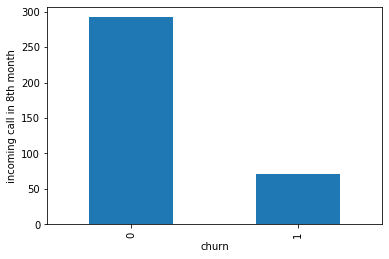

In [0]:
# Segmented Univariate Analysis for average minutes of usage of incoming calls in 8th month
churn_ic = tel_df.groupby(["churn"])
churn_ic["total_ic_mou_8"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("churn"), plt.ylabel("incoming call in 8th month")

Average minutes of usage of incoming calls in 8th month, is less for churners than the non-churners.

(Text(0.5, 0, 'churn'), Text(0, 0.5, 'outgoing call in 8th month'))

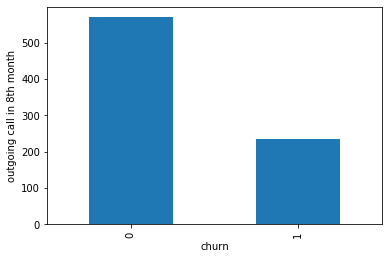

In [0]:
# Segmented Univariate Analysis for average minutes of usage of outgoing calls in 8th month
churn_ic = tel_df.groupby(["churn"])
churn_ic["total_og_mou_8"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("churn"), plt.ylabel("outgoing call in 8th month")

Average minutes of usage of outgoing calls in 8th month, is less for churners than the non-churners.

(Text(0.5, 0, 'churn'), Text(0, 0.5, 'total amount spent in 8th month'))

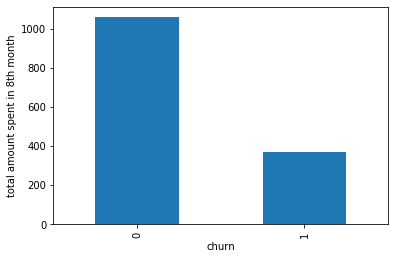

In [0]:
# Segmented Univariate Analysis for average total amount spent by customer in 8th month
churn_ic = tel_df.groupby(["churn"])
churn_ic["total_amt_8"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("churn"), plt.ylabel("total amount spent in 8th month")

Average total amount spent by customer in 8th month, is less for churners than the non-churners.

(Text(0.5, 0, 'churn'), Text(0, 0.5, 'last recharge'))

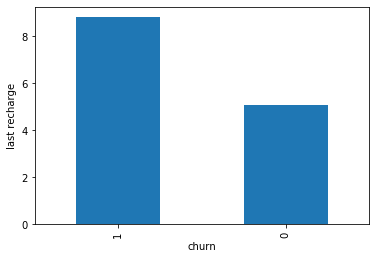

In [0]:
# Segmented Univariate Analysis for average number of days last recharge is done, calculating in 8th month
churn_ic = tel_df.groupby(["churn"])
churn_ic["days_of_last_rech_8"].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("churn"), plt.ylabel("last recharge")

Average number of days last recharge is done, is less for churners than the non-churners.

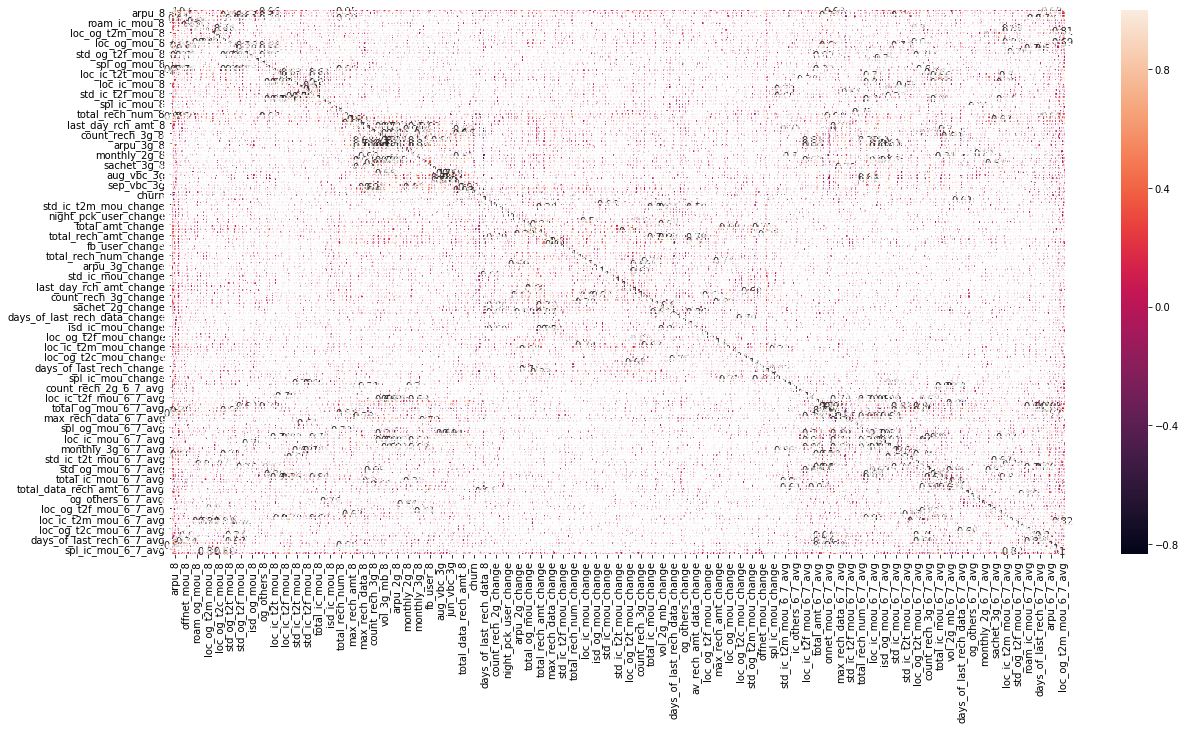

In [0]:
# Checking heatmap 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(tel_df.corr(),annot = True)

## Data Modelling 

In [0]:
# Putting feature variables to X
X = tel_df.drop(['churn'],axis=1)

# Putting target variable to y
y = tel_df['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

### PCA - Dimensionality reduction

In [0]:
# Scalign the the data of X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting to Dataframe
X_train = pd.DataFrame(data=X_train, columns=X.columns) 
X_test =  pd.DataFrame(data=X_test, columns=X.columns) 

In [0]:
# Creating PCA object
pca = PCA(svd_solver='randomized', random_state=100)

# Fitting PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

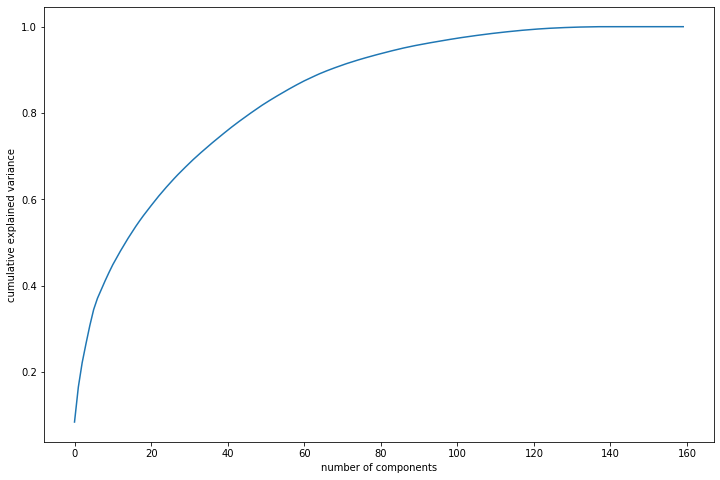

In [0]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see that 90 components are enough to describe 90% of the variance in the dataset.
Because of high imbalanced class, we will try to get variance as much as possible.

In [0]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
num_components = 90
pca_final = IncrementalPCA(n_components=num_components)
df_train_pca = pca_final.fit_transform(X_train)

In [0]:
# Applying selected components to the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20217, 90)

In [0]:
# Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8665, 90)

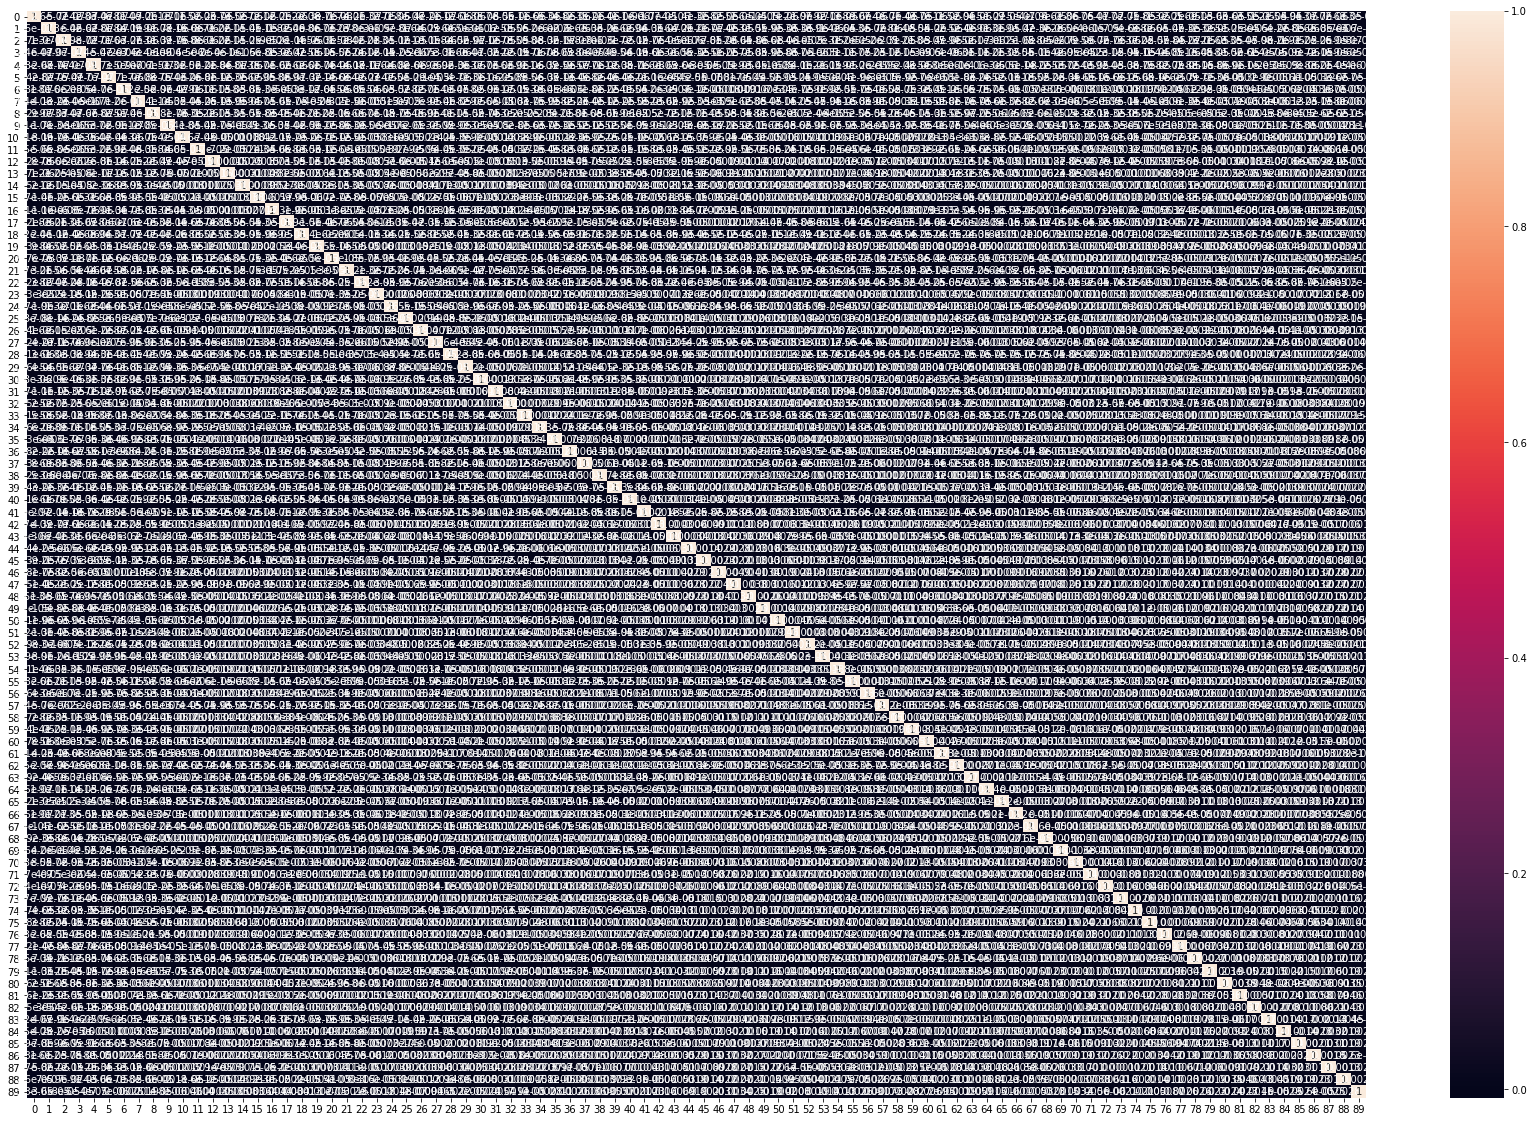

In [0]:
# Checking heatmap 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(np.corrcoef(df_train_pca.transpose()),annot = True)

Above plot shows that there is no correlation between the principal components.

## Logistic Regression

### Hyperparameter tunning using the GridSearch

In [0]:
# Intantiating PCA
pca = PCA(random_state=100)

# Intantiating LogisticRegression
classification = LogisticRegression(random_state=100, class_weight='balanced')

# making pipeline for PCA and LogisticRegression
model = make_pipeline(pca, classification)

# Intantiating KFold
fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

# hyperparameters
param_grid = {'pca__n_components':[60, 70, 80, 90, 100], 'logisticregression__C':[1,5,10,15]}

# Instantiating the grid search model
model_cv = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring = 'roc_auc',
                       cv=fold,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True)

# Fitting
model_cv.fit(X_train,y_train)

# Printing the optimal roc_auc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best roc_auc score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


The best roc_auc score is 0.8971015789758261 corresponding to hyperparameters {'logisticregression__C': 1, 'pca__n_components': 90}


In [0]:
# Storing results of grid search in new dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.864838      0.034390         0.015350        0.001207   
1       1.077808      0.064196         0.014382        0.000577   
2       1.362253      0.052160         0.017074        0.000707   
3       1.740078      0.285701         0.017126        0.001507   
4       2.046708      0.228958         0.020958        0.002533   

  param_logisticregression__C param_pca__n_components  \
0                           1                      60   
1                           1                      70   
2                           1                      80   
3                           1                      90   
4                           1                     100   

                                              params  split0_test_score  \
0  {'logisticregression__C': 1, 'pca__n_component...           0.896362   
1  {'logisticregression__C': 1, 'pca__n_component...           0.896699   
2  {'logisticregression__C': 1, 'pca__n_component...           0.896382   
3  {'logisticregression__C': 1, 'pca__n_component...           0.896334   
4  {'logisticregression__C': 1, 'pca__n_component...           0.896834   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.901835           0.890744           0.880650           0.891899   
1           0.903970           0.891542           0.882279           0.895954   
2           0.905027           0.892834           0.881527           0.900692   
3           0.907110           0.896269           0.882957           0.902838   
4           0.907312           0.894430           0.881632           0.904147   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.892298        0.007010               20            0.898479   
1         0.894089        0.007126               16            0.902789   
2         0.895293        0.008008                9            0.905617   
3         0.897102        0.008178                1            0.908735   
4         0.896871        0.008946                2            0.909517   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.898071            0.901163            0.902235   
1            0.901660            0.903662            0.905863   
2            0.904960            0.905961            0.908390   
3            0.908000            0.909292            0.911391   
4            0.908854            0.910679            0.913020   

   split4_train_score  mean_train_score  std_train_score  
0            0.899521          0.899894         0.001585  
1            0.902009          0.903197         0.001501  
2            0.903969          0.905780         0.001471  
3            0.907395          0.908962         0.001374  
4            0.908106          0.910035         0.001715

In [0]:
# Finding best hyperparameters
Cs = best_hyperparams['logisticregression__C']
Nc = best_hyperparams['pca__n_components']

# Applying best hyperparameters
pca = PCA(n_components=Nc)
classification = LogisticRegression(random_state=100, C=Cs, class_weight='balanced')
logi_model = make_pipeline(pca, classification)

# fitting model
logi_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=90,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=100,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# prediction
y_train_pred = logi_model.predict_proba(X_train)[:,1]

In [0]:
# Creating columns with different probability cutoffs 
y_train_copy = y_train.copy()

y_train_pred_final = pd.DataFrame({'label':y_train_copy, 'label_Prob':y_train_pred})

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["label_Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
8902       0    0.469829    1    1    1    1    1    0    0    0    0    0
84875      0    0.217074    1    1    1    0    0    0    0    0    0    0
81439      0    0.045891    1    0    0    0    0    0    0    0    0    0
30394      0    0.029338    1    0    0    0    0    0    0    0    0    0
66329      0    0.312228    1    1    1    1    0    0    0    0    0    0

### Model evaluation using ROC AUC, Specificity and Sensitivity.

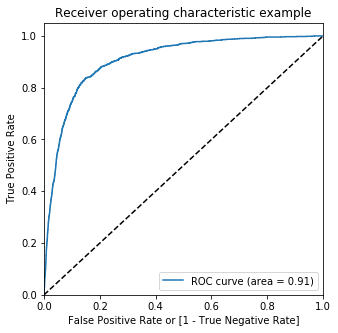

In [0]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final["label"], y_train_pred_final["label_Prob"])

Curve closely follows the left-hand border and then the top border of the ROC space which shows that model is good.

In [0]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.069644  1.000000  0.000000
0.1   0.1  0.463422  0.979403  0.424797
0.2   0.2  0.613296  0.955256  0.587697
0.3   0.3  0.707078  0.927557  0.690574
0.4   0.4  0.775486  0.892756  0.766707
0.5   0.5  0.828164  0.849432  0.826572
0.6   0.6  0.868477  0.807528  0.873040
0.7   0.7  0.897067  0.716619  0.910575
0.8   0.8  0.919919  0.592330  0.944441
0.9   0.9  0.933175  0.349432  0.976873


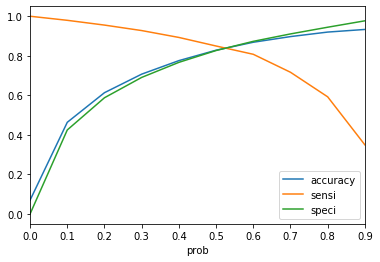

In [0]:
# plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [0]:
# Predicting churning for train data based on cutoff 0.5
y_train_pred_final['final_predicted'] = y_train_pred_final["label_Prob"].map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
8902       0    0.469829    1    1    1    1    1    0    0    0    0    0   
84875      0    0.217074    1    1    1    0    0    0    0    0    0    0   
81439      0    0.045891    1    0    0    0    0    0    0    0    0    0   
30394      0    0.029338    1    0    0    0    0    0    0    0    0    0   
66329      0    0.312228    1    1    1    1    0    0    0    0    0    0   

       final_predicted  
8902                 0  
84875                0  
81439                0  
30394                0  
66329                0

In [0]:
# Creating confusion matrix
metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final["final_predicted"])

array([[15547,  3262],
       [  212,  1196]])

In [0]:
# Format of confusion matrix
#   0  1
# 0 tn fp
# 1 fn tp

# Evaluation using ROC AUC, Specificity and Sensivity on train set
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_train_pred_final["label"], y_train_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9080079909158575
Specificity: 0.8265723855601042
Sensivity: 0.8494318181818182


In [0]:
# Prediction and evaluation on test data
y_test_pred = logi_model.predict_proba(X_test)[:,1]
y_test_copy = y_test.copy()
y_test_pred_final = pd.DataFrame({'label':y_test_copy, 'label_Prob':y_test_pred})
y_test_pred_final['final_predicted'] = y_test_pred_final["label_Prob"].map( lambda x: 1 if x > 0.5 else 0)

# Evaluation using ROC AUC, Specificity and Sensivity on test 
tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final["label"], y_test_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_test_pred_final["label"], y_test_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9027690123983549
Specificity: 0.8164817354444583
Sensivity: 0.8462732919254659


## XGBoost

### Hyperparameter tunning using the GridSearch

In [0]:
# Intantiating PCA
pca = PCA(random_state=100)

# Intantiating XGBClassifier
classification = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)
# learning_rate slowdown learning of model and reduce overfitting
# n_estimators, number of models in ensemble
# binary: logistic, logisting regression for binary classification, output probability
# Silent=True, silent the information or warnings, it is depricated 
# nthread, number of CPU threads

# making pipeline for PCA and XGBClassifier
model = make_pipeline(pca, classification)

# Intantiating KFold
fold = StratifiedKFold(n_splits=3,shuffle=True,random_state=100)

# hyperparameters
param_grid = {'pca__n_components':[60, 70],
              'xgbclassifier__colsample_bytree': [0.5, 0.6],
              'xgbclassifier__max_depth': range(5, 10, 5),
              'xgbclassifier__min_child_weight': [10, 15],
              'xgbclassifier__gamma': [1.5, 2],
             }
#colsample_bytree is the subsample ratio of columns when constructing each model of ensemble
#min_child_weight is minimum sample size in a node to split
#gamma is minimum loss reduction required to make a further partition on a leaf node of each model of ensemble

# Instantiating the grid search model
model_cv = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring = 'roc_auc',
                       cv=fold,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True)
#verbose, tell everything what is going on
#n_jobs=-1 means that the computation will be dispatched on all the CPUs

# Fitting
model_cv.fit(X_train,y_train)

# Printing the optimal roc_auc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best roc_auc score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 18.1min finished


The best roc_auc score is 0.904047649788787 corresponding to hyperparameters {'pca__n_components': 70, 'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 1.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 15}


In [0]:
# Storing results of grid search in new dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      49.691445      0.259929         0.303113        0.017231   
1      46.954173      0.336106         0.281949        0.010025   
2      44.992057      0.144172         0.279522        0.012257   
3      48.421570      0.395422         0.282659        0.004745   
4      46.230412      0.279847         0.269604        0.003309   

  param_pca__n_components param_xgbclassifier__colsample_bytree  \
0                      60                                   0.6   
1                      60                                   0.6   
2                      60                                   0.6   
3                      60                                   0.6   
4                      60                                   0.6   

  param_xgbclassifier__gamma param_xgbclassifier__max_depth  \
0                        0.5                              5   
1                        0.5                              5   
2                        0.5                              5   
3                          1                              5   
4                          1                              5   

  param_xgbclassifier__min_child_weight  \
0                                     1   
1                                     5   
2                                    10   
3                                     1   
4                                     5   

                                              params  split0_test_score  \
0  {'pca__n_components': 60, 'xgbclassifier__cols...           0.886532   
1  {'pca__n_components': 60, 'xgbclassifier__cols...           0.887612   
2  {'pca__n_components': 60, 'xgbclassifier__cols...           0.887317   
3  {'pca__n_components': 60, 'xgbclassifier__cols...           0.888134   
4  {'pca__n_components': 60, 'xgbclassifier__cols...           0.887787   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.914957           0.894471         0.898654        0.011975   
1           0.915643           0.893665         0.898973        0.012043   
2           0.918846           0.893988         0.900050        0.013567   
3           0.913890           0.894634         0.898886        0.010936   
4           0.916060           0.894555         0.899468        0.012054   

   rank_test_score  split0_train_score  split1_train_score  \
0               31            0.991546            0.988270   
1               28            0.987498            0.983117   
2               21            0.982363            0.977717   
3               29            0.991592            0.988152   
4               24            0.987207            0.983101   

   split2_train_score  mean_train_score  std_train_score  
0            0.989570          0.989795         0.001347  
1            0.984192          0.984936         0.001864  
2            0.979170          0.979750         0.001940  
3            0.989471          0.989738         0.001417  
4            0.983828          0.984712         0.001789

In [0]:
# Finding best hyperparameters
cb = best_hyperparams['xgbclassifier__colsample_bytree']
md = best_hyperparams['xgbclassifier__max_depth']
mcw = best_hyperparams['xgbclassifier__min_child_weight']
Gm = best_hyperparams['xgbclassifier__gamma']
Nc = best_hyperparams['pca__n_components']

# Applying best hyperparameters
pca = PCA(n_components=Nc, random_state=100)
classification = xgb.XGBClassifier(learning_rate=0.02, 
                                   n_estimators=600, 
                                   objective='binary:logistic', 
                                   silent=True, 
                                   nthread=1,
                                   colsample_bytree=cb,
                                   max_depth=md,
                                   min_child_weight=mcw,
                                   gamma=Gm)
final_model = make_pipeline(pca, classification)

# fitting model
final_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=70,
                     random_state=100, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=1.5,
                               learning_rate=0.02, max_delta_step=0,
                               max_depth=5, min_child_weight=15, missing=None,
                               n_estimators=600, n_jobs=1, nthread=1,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=True, subsample=1,
                               verbosity=1))],
         verbose=False)

In [0]:
# prediction
y_train_pred = final_model.predict_proba(X_train)[:,1]

In [0]:
# Creating columns with different probability cutoffs 
y_train_copy = y_train.copy()

y_train_pred_final = pd.DataFrame({'label':y_train_copy, 'label_Prob':y_train_pred})

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["label_Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
8902       0    0.048820    1    0    0    0    0    0    0    0    0    0
84875      0    0.035062    1    0    0    0    0    0    0    0    0    0
81439      0    0.009272    1    0    0    0    0    0    0    0    0    0
30394      0    0.008710    1    0    0    0    0    0    0    0    0    0
66329      0    0.009088    1    0    0    0    0    0    0    0    0    0

### Model evaluation using ROC AUC, Specificity and Sensitivity.

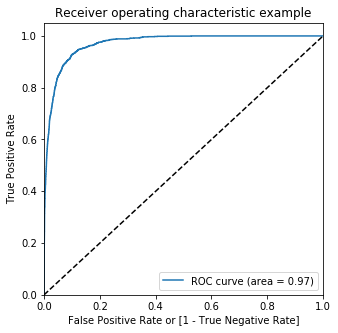

In [0]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final["label"], y_train_pred_final["label_Prob"])

In [0]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.069644  1.000000  0.000000
0.1   0.1  0.910669  0.910511  0.910681
0.2   0.2  0.947470  0.814631  0.957414
0.3   0.3  0.955631  0.712358  0.973842
0.4   0.4  0.959193  0.602273  0.985911
0.5   0.5  0.956967  0.476562  0.992929
0.6   0.6  0.951773  0.337358  0.997767
0.7   0.7  0.940990  0.157670  0.999628
0.8   0.8  0.933422  0.044744  0.999947
0.9   0.9  0.930455  0.001420  1.000000


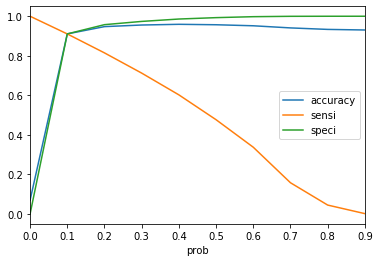

In [0]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [0]:
# Predicting churning for train data based on cutoff 0.5
y_train_pred_final['final_predicted'] = y_train_pred_final["label_Prob"].map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
8902       0    0.048820    1    0    0    0    0    0    0    0    0    0   
84875      0    0.035062    1    0    0    0    0    0    0    0    0    0   
81439      0    0.009272    1    0    0    0    0    0    0    0    0    0   
30394      0    0.008710    1    0    0    0    0    0    0    0    0    0   
66329      0    0.009088    1    0    0    0    0    0    0    0    0    0   

       final_predicted  
8902                 0  
84875                0  
81439                0  
30394                0  
66329                0

In [0]:
# Evaluation using ROC AUC, Specificity and Sensivity  on train set
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_train_pred_final["label"], y_train_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9710254157825798
Specificity: 0.8274230421606678
Sensivity: 0.9630681818181818


In [0]:
# Prediction and evaluation on test data
y_test_pred = final_model.predict_proba(X_test)[:,1]
y_test_copy = y_test.copy()
y_test_pred_final = pd.DataFrame({'label':y_test_copy, 'label_Prob':y_test_pred})
y_test_pred_final['final_predicted'] = y_test_pred_final["label_Prob"].map( lambda x: 1 if x > 0.05 else 0)


# Evaluation using ROC AUC, Specificity and Sensivity on test set
tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final["label"], y_test_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_test_pred_final["label"], y_test_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9185921892919284
Specificity: 0.8091260441341479
Sensivity: 0.8850931677018633


## SVM

In [0]:
# Selecing kernel for SVC

# Intantiating RandomUnderSampler
sampling = RandomUnderSampler(random_state=100)

# SVM using linear kernel
classification = SVC(kernel='linear')
model_linear = make_pipeline(sampling, classification)
fold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
cv = cross_val_score(model_linear,X_train,y_train,cv=fold,scoring="roc_auc",n_jobs=-1)
print(cv.mean())

# SVM using polynomial kernel
classification = SVC(kernel='poly')
model_poly = make_pipeline(sampling, classification)
fold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
cv = cross_val_score(model_poly,X_train,y_train,cv=fold,scoring="roc_auc",n_jobs=-1)
print(cv.mean())

# SVM using RBF kernel
classification = SVC(kernel='rbf')
model_rbf = make_pipeline(sampling, classification)
fold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
cv = cross_val_score(model_rbf,X_train,y_train,cv=fold,scoring="roc_auc",n_jobs=-1)
print(cv.mean())

0.8812936536151189
0.8850271454442405
0.9034248723017502


We will use RBF kernel since it giving better roc_auc value than other kernels

### Hyperparameter tunning using the GridSearch

In [0]:
# Intantiating PCA
pca = PCA(random_state=100)

# Intantiating RandomUnderSampler
sampling = RandomUnderSampler()

# Intantiating SVC
classification = SVC(kernel='rbf')

# making pipeline for PCA, RandomUnderSampler and SVC
model = make_pipeline(sampling, pca, classification)

# Intantiating KFold
fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

# Hyperparameters
param_grid = {'pca__n_components':[40, 50, 60], 'svc__gamma':[1e-2,1e-3,1e-4], 'svc__C':[1, 5]}

# Instantiating the grid search model
model_cv = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring = 'roc_auc',
                       cv=fold,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True)

# Fitting
model_cv.fit(X_train,y_train)

# Printing the optimal auc_roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best roc_auc score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


The best roc_auc score is 0.9034930057407156 corresponding to hyperparameters {'pca__n_components': 60, 'svc__C': 1, 'svc__gamma': 0.01}


In [0]:
# Storing results of grid search in new dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.405955      0.020770         0.450694        0.016511   
1       0.369689      0.011926         0.429585        0.008314   
2       0.444941      0.007394         0.573437        0.009944   
3       0.446283      0.002498         0.461554        0.020344   
4       0.362725      0.007868         0.404855        0.014838   

  param_pca__n_components param_svc__C param_svc__gamma  \
0                      40            1             0.01   
1                      40            1            0.001   
2                      40            1           0.0001   
3                      40            5             0.01   
4                      40            5            0.001   

                                              params  split0_test_score  \
0  {'pca__n_components': 40, 'svc__C': 1, 'svc__g...           0.903467   
1  {'pca__n_components': 40, 'svc__C': 1, 'svc__g...           0.895647   
2  {'pca__n_components': 40, 'svc__C': 1, 'svc__g...           0.883067   
3  {'pca__n_components': 40, 'svc__C': 5, 'svc__g...           0.900818   
4  {'pca__n_components': 40, 'svc__C': 5, 'svc__g...           0.903692   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909328           0.895045           0.895240           0.901890   
1           0.904943           0.880056           0.870862           0.885950   
2           0.892145           0.869629           0.858392           0.865479   
3           0.907270           0.889133           0.896946           0.897564   
4           0.909653           0.888498           0.880330           0.896476   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.900994        0.005383                4            0.933884   
1         0.887493        0.011877               12            0.893742   
2         0.873744        0.012218               18            0.872779   
3         0.898346        0.005886                7            0.957149   
4         0.895730        0.010462                9            0.906354   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.931297            0.937886            0.932291   
1            0.892406            0.894078            0.897545   
2            0.870774            0.877993            0.880103   
3            0.957628            0.960144            0.957893   
4            0.901786            0.907694            0.910123   

   split4_train_score  mean_train_score  std_train_score  
0            0.934873          0.934046         0.002284  
1            0.896032          0.894761         0.001812  
2            0.877650          0.875860         0.003496  
3            0.961754          0.958914         0.001755  
4            0.906642          0.906520         0.002714

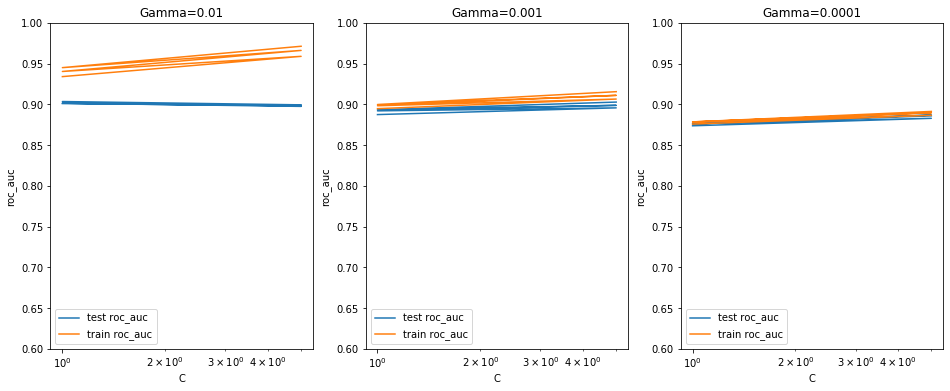

In [0]:
# converting C to numeric type for plotting on x-axis
cv_results['param_svc__C'] = cv_results['param_svc__C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_svc__gamma']==0.01]

plt.plot(gamma_01["param_svc__C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_svc__C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test roc_auc', 'train roc_auc'], loc='lower left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_svc__gamma']==0.001]

plt.plot(gamma_001["param_svc__C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_svc__C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test roc_auc', 'train roc_auc'], loc='lower left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_svc__gamma']==0.0001]

plt.plot(gamma_0001["param_svc__C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_svc__C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test roc_auc', 'train roc_auc'], loc='lower left')
plt.xscale('log')

In [0]:
# Finding best hyperparameters
#To reduce the overfitting, we will choose gamma=0.001
Gm = 0.001
Cs = best_hyperparams['svc__C']
Nc = best_hyperparams['pca__n_components']

# Applying best hyperparameters
pca = PCA(n_components=Nc, random_state=100)
sampling = RandomUnderSampler(random_state=100)
classification = SVC(kernel="rbf", C=Cs, gamma=Gm, probability=True)
final_model = make_pipeline(sampling, pca, classification)

# fitting model
final_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=100, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=100, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [0]:
# prediction
y_train_pred = final_model.predict_proba(X_train)[:,1]

In [0]:
# Creating columns with different probability cutoffs 
y_train_copy = y_train.copy()

y_train_pred_final = pd.DataFrame({'label':y_train_copy, 'label_Prob':y_train_pred})

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["label_Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
8902       0    0.600524    1    1    1    1    1    1    1    0    0    0
84875      0    0.363311    1    1    1    1    0    0    0    0    0    0
81439      0    0.040622    1    0    0    0    0    0    0    0    0    0
30394      0    0.056287    1    0    0    0    0    0    0    0    0    0
66329      0    0.210493    1    1    1    0    0    0    0    0    0    0

### Model evaluation using ROC AUC, Specificity and Sensitivity.

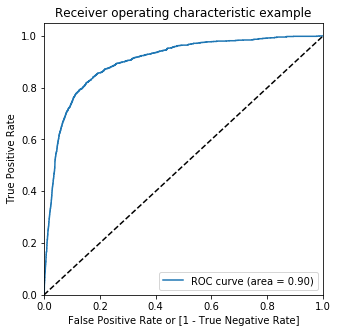

In [0]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final["label"], y_train_pred_final["label_Prob"])

In [0]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.069644  1.000000  0.000000
0.1   0.1  0.397537  0.980114  0.353926
0.2   0.2  0.584558  0.952415  0.557021
0.3   0.3  0.697878  0.912642  0.681801
0.4   0.4  0.773112  0.877131  0.765325
0.5   0.5  0.831577  0.832386  0.831517
0.6   0.6  0.870554  0.785511  0.876921
0.7   0.7  0.901914  0.710938  0.916210
0.8   0.8  0.924766  0.593750  0.949545
0.9   0.9  0.933571  0.282670  0.982296


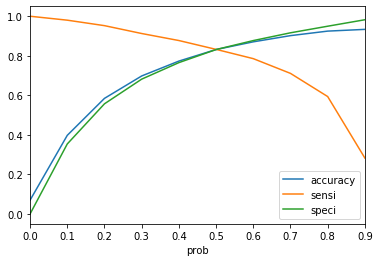

In [0]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [0]:
# Predicting churning for train data based on cutoff 0.5
y_train_pred_final['final_predicted'] = y_train_pred_final["label_Prob"].map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
8902       0    0.600524    1    1    1    1    1    1    1    0    0    0   
84875      0    0.363311    1    1    1    1    0    0    0    0    0    0   
81439      0    0.040622    1    0    0    0    0    0    0    0    0    0   
30394      0    0.056287    1    0    0    0    0    0    0    0    0    0   
66329      0    0.210493    1    1    1    0    0    0    0    0    0    0   

       final_predicted  
8902                 1  
84875                0  
81439                0  
30394                0  
66329                0

In [0]:
# Evaluation using ROC AUC, Specificity and Sensivity  on train set
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_train_pred_final["label"], y_train_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9018843810869072
Specificity: 0.8315168270508799
Sensivity: 0.8323863636363636


In [0]:
# Prediction and evaluation on test data
y_test_pred = final_model.predict_proba(X_test)[:,1]
y_test_copy = y_test.copy()
y_test_pred_final = pd.DataFrame({'label':y_test_copy, 'label_Prob':y_test_pred})
y_test_pred_final['final_predicted'] = y_test_pred_final["label_Prob"].map( lambda x: 1 if x > 0.5 else 0)


# Evaluation using ROC AUC, Specificity and Sensivity on test set
tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final["label"], y_test_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_test_pred_final["label"], y_test_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.897145575163333
Specificity: 0.822466026679965
Sensivity: 0.8338509316770186


## Random Forest
For Feature Selection 
Without PCA

In [0]:
# Intantiating RandomForestClassifier
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [0]:
# Checking important features where importance score is greater than 0
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_df = pd.DataFrame(feature_imp).reset_index()
feature_imp_df.columns = ["feature", "imp_score"]
feature_imp_df = feature_imp_df[feature_imp_df["imp_score"] > 0]
feature_imp_df

feature  imp_score
0           total_ic_mou_8   0.072374
1             loc_ic_mou_8   0.056761
2              total_amt_8   0.036271
3           max_rech_amt_8   0.033293
4         loc_og_t2m_mou_8   0.031304
..                     ...        ...
155  night_pck_user_change   0.000177
156       night_pck_user_8   0.000142
157    total_ic_mou_change   0.000118
158            og_others_8   0.000118
159           spl_ic_mou_8   0.000002

[160 rows x 2 columns]

In [0]:
# Finding roc_score for all the features
roc_score=[]
for i in feature_imp_df["imp_score"].values:
    feature_imp_df1 = feature_imp_df[feature_imp_df["imp_score"] >= i]
    X_train_imp = X_train[list(feature_imp_df1["feature"])]
    clf.fit(X_train_imp,y_train)
    y_train_pred = clf.predict(X_train_imp)
    roc_score.append(metrics.roc_auc_score(y_train, y_train_pred))


In [0]:
# Adding roc_score to dataframe feature_imp_df
feature_imp_df["roc_auc"] = roc_score
feature_imp_df.head(20)

feature  imp_score   roc_auc
0           total_ic_mou_8   0.072374  0.857626
1             loc_ic_mou_8   0.056761  0.915061
2              total_amt_8   0.036271  0.908569
3           max_rech_amt_8   0.033293  0.905968
4         loc_og_t2m_mou_8   0.031304  0.914623
5         loc_ic_t2m_mou_8   0.018890  0.912874
6            roam_og_mou_8   0.017645  0.927101
7      days_of_last_rech_8   0.017585  0.937941
8           total_og_mou_8   0.013634  0.944927
9            roam_ic_mou_8   0.013073  0.947679
10         max_rech_data_8   0.012983  0.944865
11                     aon   0.012876  0.949530
12  total_rech_amt_6_7_avg   0.012595  0.948953
13                  arpu_8   0.012576  0.951137
14  total_rech_num_6_7_avg   0.012364  0.951874
15            arpu_6_7_avg   0.012239  0.952176
16        total_rech_amt_8   0.012167  0.952176
17       total_amt_6_7_avg   0.012082  0.956739
18      offnet_mou_6_7_avg   0.012030  0.946875
19  loc_ic_t2m_mou_6_7_avg   0.011989  0.953623

### Important features for the telecom churn

In [0]:
# Extracting important features based on 95% ROC AUC
for x, y in zip(feature_imp_df["imp_score"].values, feature_imp_df["roc_auc"].values):
    if str(y)[:4] == "0.95":
        max_imp_score = x
        max_roc_auc = y
        break
feature_imp_df_new = feature_imp_df[feature_imp_df["imp_score"] >= max_imp_score]
X_train_imp = X_train[list(feature_imp_df_new["feature"])]
X_test_imp = X_test[list(feature_imp_df_new["feature"])]

print("No. of imporatant features", len(list(feature_imp_df_new["feature"])))
print("List of imporatant features", list(feature_imp_df_new["feature"]))

No. of imporatant features 14
List of imporatant features ['total_ic_mou_8', 'loc_ic_mou_8', 'total_amt_8', 'max_rech_amt_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'days_of_last_rech_8', 'total_og_mou_8', 'roam_ic_mou_8', 'max_rech_data_8', 'aon', 'total_rech_amt_6_7_avg', 'arpu_8']


No handles with labels found to put in legend.


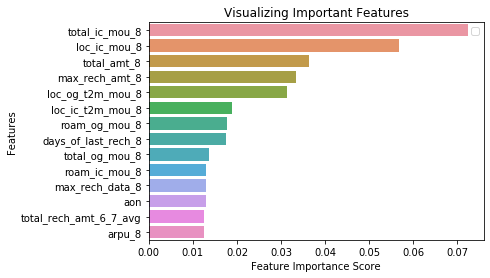

In [0]:
# Creating a bar plot of imporatant features
sns.barplot(x=feature_imp_df1["imp_score"], y=feature_imp_df_new["feature"])
# Add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Hyperparameter tunning using the GridSearch

In [0]:
# Creating new model with RandomForestClassifier by using important variables
# Intantiating RandomForestClassifier
model = RandomForestClassifier(bootstrap=True, random_state=100)

# Intantiating KFold
fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

# Hyperparameters
hyperparameter = {'max_depth': range(5, 10, 5),
                  'min_samples_leaf': range(10, 50, 10),
                  'min_samples_split': range(10, 50, 10),
                  'n_estimators': [300, 400]}

# Instantiating the grid search model
model_cv = GridSearchCV(estimator=model,
                       param_grid=hyperparameter,
                       scoring = 'roc_auc',
                       cv=fold,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True)

# Fitting
model_cv.fit(X_train_imp,y_train)

# Printing the optimal auc_roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best roc_auc score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 10.0min finished


The best roc_auc score is 0.9098188688855835 corresponding to hyperparameters {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 300}


In [0]:
# Storing results of grid search in new dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.851422      0.048236         0.132135        0.001552   
1       7.872565      0.057174         0.171046        0.004164   
2       5.879371      0.063062         0.128663        0.002127   
3       7.889787      0.066201         0.175877        0.010705   
4       5.895377      0.049106         0.128774        0.001272   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     10                      10   
1               5                     10                      10   
2               5                     10                      20   
3               5                     10                      20   
4               5                     10                      30   

  param_n_estimators                                             params  \
0                300  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...   
1                400  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...   
2                300  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...   
3                400  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...   
4                300  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.902091           0.917595           0.921659           0.898984   
1           0.902394           0.918094           0.921478           0.899109   
2           0.902091           0.917595           0.921659           0.898984   
3           0.902394           0.918094           0.921478           0.899109   
4           0.902708           0.919503           0.922567           0.899391   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.903492         0.908765        0.009080               23   
1           0.903558         0.908927        0.009050               17   
2           0.903492         0.908765        0.009080               23   
3           0.903558         0.908927        0.009050               17   
4           0.904919         0.909819        0.009377                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.922765            0.918539            0.918642   
1            0.922899            0.918376            0.918678   
2            0.922765            0.918539            0.918642   
3            0.922899            0.918376            0.918678   
4            0.922162            0.919056            0.918931   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.924403            0.923566          0.921583         0.002498  
1            0.924249            0.923501          0.921541         0.002499  
2            0.924403            0.923566          0.921583         0.002498  
3            0.924249            0.923501          0.921541         0.002499  
4            0.924619            0.923749          0.921703         0.002349

In [0]:
# Finding best hyperparameters
md = best_hyperparams['max_depth']
msl = best_hyperparams['min_samples_leaf']
mss = best_hyperparams['min_samples_split']
ne = best_hyperparams['n_estimators']

# Applying best hyperparameters
final_model = RandomForestClassifier(bootstrap=True,
                                     max_depth=md,
                                     min_samples_leaf=msl,
                                     min_samples_split=mss,
                                     n_estimators=ne)

# fitting model
final_model.fit(X_train_imp, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# prediction
y_train_pred = final_model.predict_proba(X_train_imp)[:,1]


In [0]:
# Creating columns with different probability cutoffs 
y_train_copy = y_train.copy()

y_train_pred_final = pd.DataFrame({'label':y_train_copy, 'label_Prob':y_train_pred})

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["label_Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
8902       0    0.021674    1    0    0    0    0    0    0    0    0    0
84875      0    0.011646    1    0    0    0    0    0    0    0    0    0
81439      0    0.014526    1    0    0    0    0    0    0    0    0    0
30394      0    0.067227    1    0    0    0    0    0    0    0    0    0
66329      0    0.024337    1    0    0    0    0    0    0    0    0    0

### Model evaluation using ROC AUC, Specificity and Sensitivity.

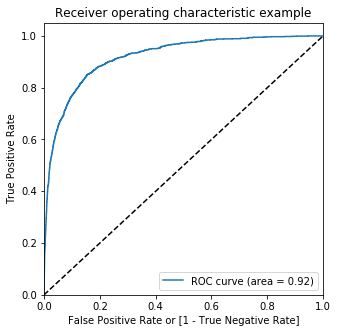

In [0]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final["label"], y_train_pred_final["label_Prob"])

In [0]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.069644  1.000000  0.000000
0.1   0.1  0.893951  0.763494  0.903716
0.2   0.2  0.937033  0.601562  0.962146
0.3   0.3  0.945838  0.489347  0.980010
0.4   0.4  0.945689  0.432528  0.984103
0.5   0.5  0.946530  0.400568  0.987400
0.6   0.6  0.944552  0.323864  0.991015
0.7   0.7  0.940496  0.202415  0.995747
0.8   0.8  0.930356  0.000000  1.000000
0.9   0.9  0.930356  0.000000  1.000000


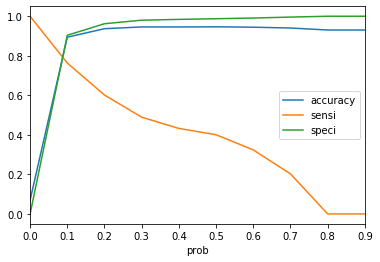

In [0]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [0]:
# Predicting churning for train data based on cutoff 0.06
y_train_pred_final['final_predicted'] = y_train_pred_final["label_Prob"].map( lambda x: 1 if x > 0.06 else 0)
y_train_pred_final.head()

label  label_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
8902       0    0.021674    1    0    0    0    0    0    0    0    0    0   
84875      0    0.011646    1    0    0    0    0    0    0    0    0    0   
81439      0    0.014526    1    0    0    0    0    0    0    0    0    0   
30394      0    0.067227    1    0    0    0    0    0    0    0    0    0   
66329      0    0.024337    1    0    0    0    0    0    0    0    0    0   

       final_predicted  
8902                 0  
84875                0  
81439                0  
30394                1  
66329                0

In [0]:
# Evaluation using ROC AUC, Specificity and Sensivity  on train set
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final["label"], y_train_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_train_pred_final["label"], y_train_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9199746162378747
Specificity: 0.8291243553617949
Sensivity: 0.859375


In [0]:
# Prediction and evaluation on test data
y_test_pred = final_model.predict_proba(X_test_imp)[:,1]
y_test_copy = y_test.copy()
y_test_pred_final = pd.DataFrame({'label':y_test_copy, 'label_Prob':y_test_pred})
y_test_pred_final['final_predicted'] = y_test_pred_final["label_Prob"].map( lambda x: 1 if x > 0.06 else 0)


# Evaluation using ROC AUC, Specificity and Sensivity on test set
tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final["label"], y_test_pred_final["final_predicted"]).ravel()
specificity = tn / float(tn+fp)
sensivity = tp / float(fn+tp)
print("ROC AUC:", metrics.roc_auc_score(y_test_pred_final["label"], y_test_pred_final["label_Prob"]))
print("Specificity:", specificity)
print("Sensivity:", sensivity)

ROC AUC: 0.9204312089151072
Specificity: 0.8245854631592071
Sensivity: 0.860248447204969


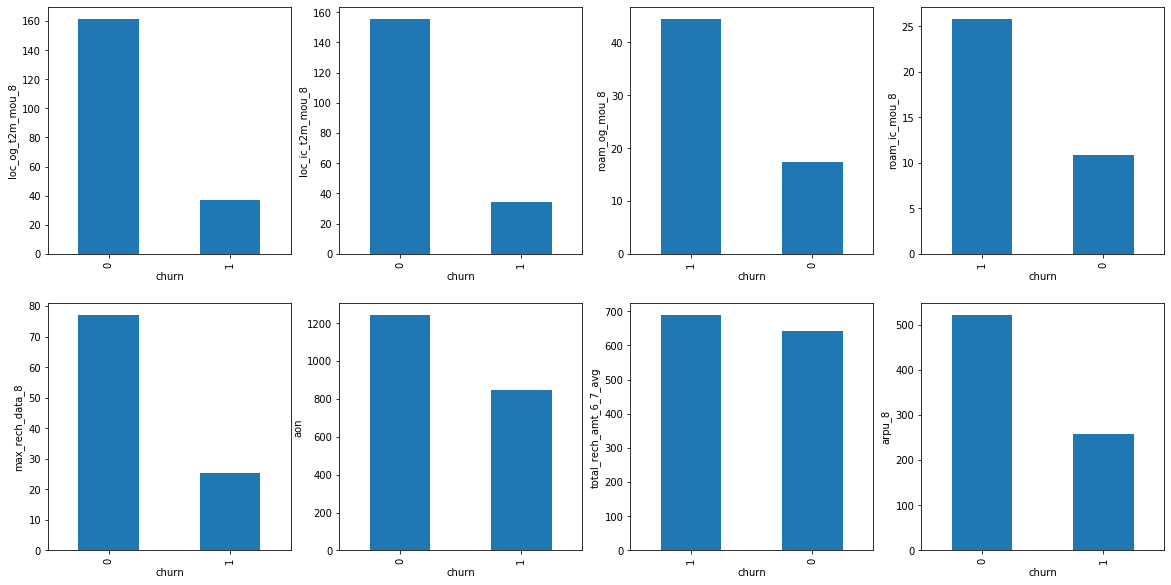

In [0]:
# Plotting important features against churn variable
new_var = ['loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'max_rech_data_8', 'aon', 'total_rech_amt_6_7_avg', 'arpu_8']
def plot_box(var_list):
    plt.figure(figsize=(20, 10))
    churn_ic = tel_df.groupby(["churn"])
    i = 0
    for var in var_list:
        i = i+1
        plt.subplot(2,4,i)
        churn_ic[var].mean().sort_values(ascending=False).plot(kind='bar')
        plt.xlabel("churn"), plt.ylabel(var)
plot_box(new_var)

##.



Choosing SVM model based on ROC Score. 

In [0]:
model_scores = pd.DataFrame({"Model":["Random Forest", "Logistic Regression", "XGBoost", "SVM"], 
                             "ROC_AUC_train":[0.9199746162378747,0.9080079909158575,0.9710254157825798,0.9018843810869072],
                             "ROC_AUC_test":[0.9204312089151072,0.9027690123983549,0.9185921892919284,0.897145575163333], 
                             "Specificity_train":[0.8291243553617949,0.8265723855601042,0.8274230421606678,0.8315168270508799], 
                             "Specificity_test":[0.8245854631592071,0.8164817354444583,0.8091260441341479,0.822466026679965], 
                             "Sensivity_train":[0.859375,0.8494318181818182,0.9630681818181818,0.8323863636363636], 
                             "Sensivity_test":[0.860248447204969,0.8462732919254659,0.8850931677018633,0.8338509316770186]})
round(model_scores, 2)

Model  ROC_AUC_train  ROC_AUC_test  Specificity_train  \
0        Random Forest           0.92          0.92               0.83   
1  Logistic Regression           0.91          0.90               0.83   
2              XGBoost           0.97          0.92               0.83   
3                  SVM           0.90          0.90               0.83   

   Specificity_test  Sensivity_train  Sensivity_test  
0              0.82             0.86            0.86  
1              0.82             0.85            0.85  
2              0.81             0.96            0.89  
3              0.82             0.83            0.83

Since it is more important to identify churner than non churners accurately so our focus for identifying the suitable model is based on the sensivity.

We are choosing Random Forest Model because ROC AUC & Sensivity are good and model is stable, not overfitting.

## Recommendations
Recommending strategies to manage customer churn based on observations.

Most of the important features belong to the 8th Month which is action phase. By using the important variables of action phase in random forest model, company can predict the customer churn and take necessary actions before they churn.

As per the observations, customers are more likely to churn who's, 
- total minutes of usage of incoming calls in action phase is less than 100.
- total minutes of usage of outgoing calls in action phase is less than 300.
- total amount spent in action phase is less than 400.
- average revenue per unit is less than 300.


Recommendations to management team -
- Based on the important features identified in the modelling management should pay special attention to sudden and drastic decrease in 'Minutes of Usage'- incoming or outgoing, 'Recharge amount' and 'Data consumption'. 

- An analytic tool should be used which generate report of the potential churners - decrease of more than 20% percent(average decrease from good phase to action phase) in four or more of these features should be flagged by this reporting tool. 

- Once potential churners are identified they should be contacted by senior retention executive from customer support team to understand and alleviate the pain of the customer. Customer service executive should also be able to entice customer by providing some special offer/discount/exclusive products.

- Finally, all these pain points which came as feedback from customer should be carefully analysed and appropriate changes in product, services and pricing should be considered.